# Exploring Data

In [4]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 

### Import Data

In [5]:
df = pd.read_csv("data/customer.csv")
print("df type:", type(df))
print("df shape: ", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape:  (28885, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


Subsetting Data

 - The project focuses on households that have "been turned down for credit or feared being denied credit in the past 5 years." These households are identified in the "TURNFEAR" column.

In [7]:
mask = df["TURNFEAR"] == 1
df_fear = df[mask]
print("df_fear shape: ", df_fear.shape)
df_fear.head()

df_fear shape:  (4623, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
5,2,21,3790.476607,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
6,2,22,3798.868505,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,3,2,2
7,2,23,3799.468393,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
8,2,24,3788.076005,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2
9,2,25,3793.066589,1,50,3,8,2,1,3,...,1,2,1,2,1,1,4,4,2,2


### Explore

Age Groups

- The aim is to  create a list age_groups with the unique values in the "AGECL" column

In [8]:
df_fear["AGECL"].nunique()

6

In [10]:
age_groups=df_fear["AGECL"].unique()
print("Age Groups:", age_groups)

Age Groups: [3 5 1 2 4 6]


Age Groups as per the data dictionary: 

- 1 : AGE < 35
- 2 : AGE 35 - 44
- 3 : AGE 45 -54
- 4 : AGE 55 - 64
- 5 : AGE 65 - 74
- 6 : AGE >= 75

Replace Age Groups:

- Next step is to create a version of this column that uses the actual group names.

In [13]:
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = df_fear["AGECL"].replace(agecl_dict)
print("age_cl type:", type(age_cl))
print("age_cl shape:", age_cl.shape)
age_cl.head(10)

age_cl type: <class 'pandas.core.series.Series'>
age_cl shape: (4623,)


5      45-54
6      45-54
7      45-54
8      45-54
9      45-54
110    65-74
111    65-74
112    65-74
113    65-74
114    65-74
Name: AGECL, dtype: object

Age Group Bar Chart

- Goal is to create a bar chart showing the value counts from age_cl.

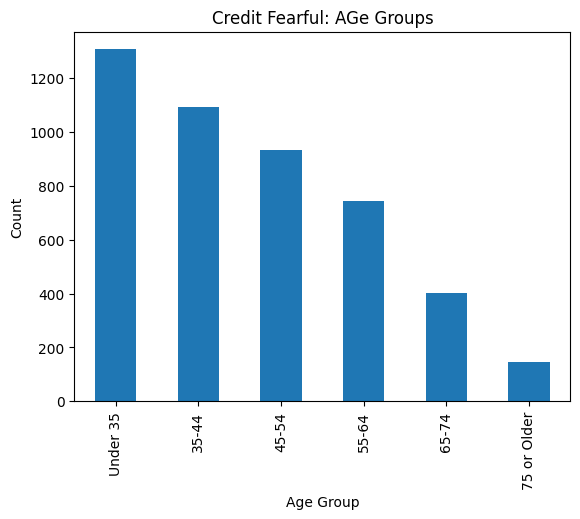

In [21]:
age_cl_value_counts = age_cl.value_counts()

age_cl_value_counts.plot(
    kind = "bar",
    xlabel="Age Group",
    ylabel="Count",
    title="Credit Fearful: AGe Groups"
);


- Under 35 seems to be the biggest in the credit fearful population.
- The chart is telling us that many of the people who fear being denied credit are younger. But the first two age groups cover a wider range than the other four. So it might be useful to look inside those values to get a more granular understanding of the data.

Age Histogram

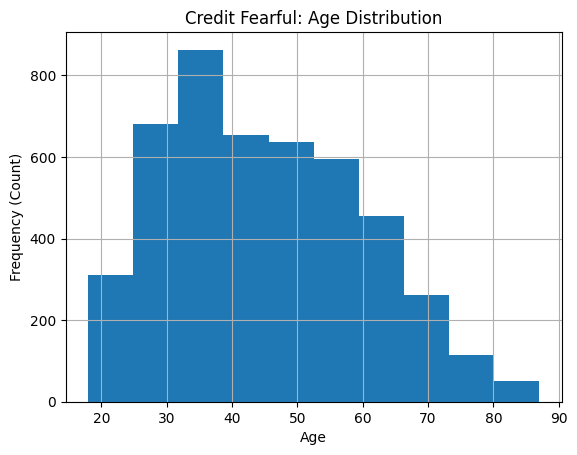

In [20]:
df_fear["AGE"].hist(bins=10)
plt.xlabel("Age")
plt.ylabel("Frequency (Count)")
plt.title("Credit Fearful: Age Distribution");


- The histogram suggests that younger people are still more concerned about being able to secure a loan than older people, but the people who are most concerned seem to be between 30 and 40.

Race

There are 4 categories of races:
- 1: White non-Hispanic
- 2: Black / African American
- 3: Hispanic
- 5: Other

Race Bar Chart: Credit Fearful

- The goal is to create a horizontal bar chart showing the normalized value counts for "RACE".

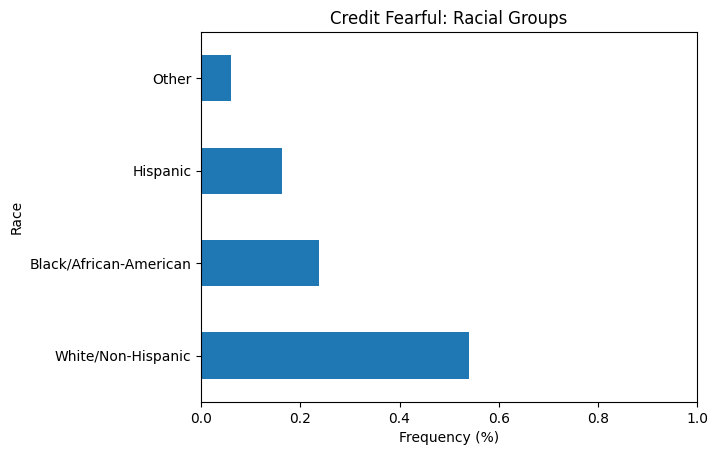

In [26]:
race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}
race = df_fear["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups");

- The bar chart suggests that White/Non-Hispanic people worry more about being denied credit, but thinking critically about what we're seeing, that might be because there are more White/Non-Hispanic in the population of the United States than there are other racial groups, and the sample for this survey was specifically drawn to be representative of the population as a whole.

Race Bar Chart: Whole Dataset

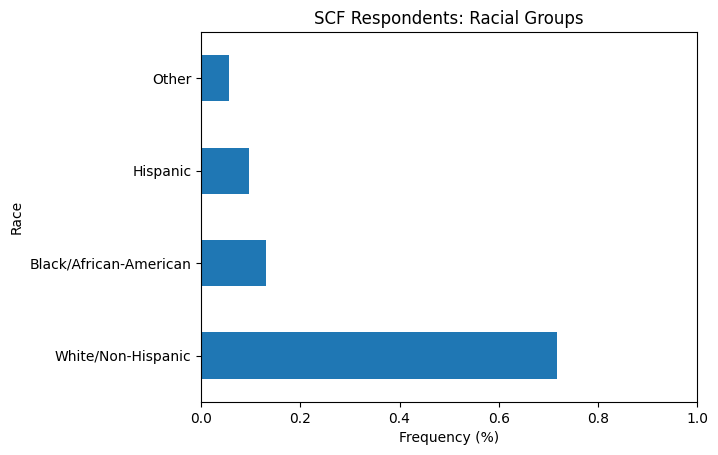

In [28]:
race = df["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

- On the one hand, we can see that White Non-Hispanics account for around 70% of whole dataset, but only 54% of credit fearful respondents. On the other hand, Black and Hispanic respondents represent 23% of the whole dataset but 40% of credit fearful respondents. In other words, Black and Hispanic households are actually more likely to be in the credit fearful group.

Explore Income

Income percentile groups
- 1 = 0-20
- 2 = 20-39.9
- 3 = 40-59.9
- 4 = 60-79.9
- 5 = 80-89.9
- 6 = 90-100

Income Categories: Credit Fearful vs Credit Fearless

In [36]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = (
    df["INCCAT"]
    .replace(inccat_dict)
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("Frequency")
    .to_frame()
    .reset_index()
)

print("df_inccat type:", type(df_inccat))
print("df_inccat shape:", df_inccat.shape)
df_inccat

df_inccat type: <class 'pandas.core.frame.DataFrame'>
df_inccat shape: (12, 3)


,TURNFEAR,INCCAT,Frequency
0,0,90-100,0.297296
1,0,60-79.9,0.174841
2,0,40-59.9,0.143146
3,0,0-20,0.140343
4,0,21-39.9,0.135933
5,0,80-89.9,0.108441
6,1,0-20,0.288125
7,1,21-39.9,0.256327
8,1,40-59.9,0.228856
9,1,60-79.9,0.132598


Income Categories: Side-by-Side Bar Chart

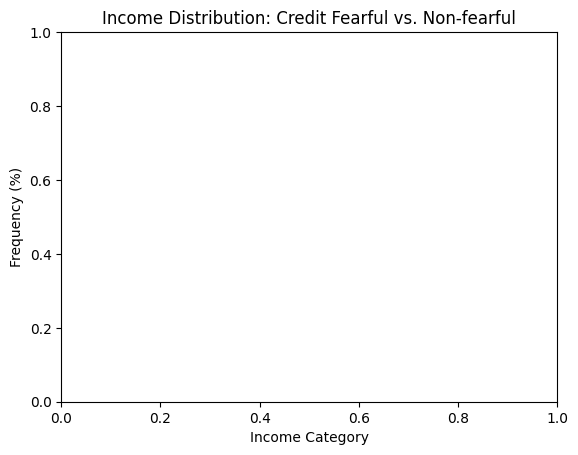

In [37]:
# Create bar chart of `df_inccat`

plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");